In [ ]:
import pandas as pd
import numpy as np

### Data

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
import matplotlib.pyplot as plt

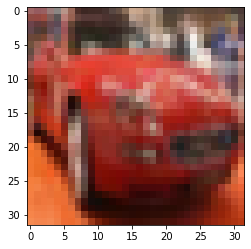

In [10]:
plt.imshow(x_train[5])

### Pre-processing

In [11]:
x_train.max()

255

In [12]:
x_train.min()

0

In [13]:
x_train = x_train/255
x_test  = x_test/255

### Labels

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

### Build the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [22]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 125s 31ms/step - loss: 1.5224 - accuracy: 0.4523 - val_loss: 1.4493 - val_accuracy: 0.5033
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1609 - accuracy: 0.5945 - val_loss: 1.2702 - val_accuracy: 0.5600
Epoch 3/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0058 - accuracy: 0.6551 - val_loss: 1.0999 - val_accuracy: 0.6172
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8982 - accuracy: 0.6911 - val_loss: 0.9967 - val_accuracy: 0.6586
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8187 - accuracy: 0.7190 - val_loss: 1.0217 - val_accuracy: 0.6611
Epoch 6/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7526 - accuracy: 0.7447 - val_loss: 1.0146 - val_accuracy: 0.6601
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6963 - accuracy: 0.7632 - val_loss: 1.0354 

In [ ]:
#model.save("cifar10.model")

In [23]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.522436,0.45232,1.449252,0.5033
1,1.160947,0.59452,1.270187,0.5600
2,1.005810,0.65514,1.099921,0.6172
3,0.898219,0.69112,0.996693,0.6586
4,0.818665,0.71902,1.021690,0.6611


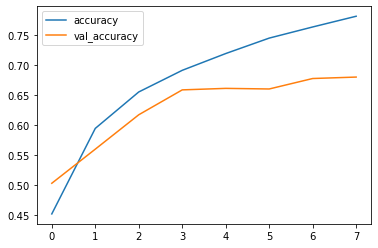

In [24]:
losses[['accuracy','val_accuracy']].plot()

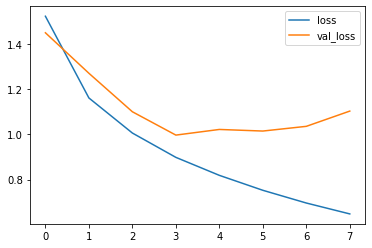

In [25]:
losses[['loss','val_loss']].plot()

### Evaluation

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test).round()

In [30]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1000
           1       0.82      0.81      0.81      1000
           2       0.73      0.43      0.54      1000
           3       0.57      0.34      0.43      1000
           4       0.62      0.66      0.63      1000
           5       0.76      0.39      0.51      1000
           6       0.77      0.74      0.75      1000
           7       0.78      0.73      0.75      1000
           8       0.76      0.79      0.77      1000
           9       0.77      0.78      0.77      1000

   micro avg       0.73      0.64      0.68     10000
   macro avg       0.73      0.64      0.67     10000
weighted avg       0.73      0.64      0.67     10000
 samples avg       0.64      0.64      0.64     10000



C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Mayur
confusion_matrix(y_cat_test.argmax(axis = 1), predictions.argmax(axis = 1))

array([[783,  22,  20,   9,  17,   3,   9,   8,  94,  35],
       [ 59, 805,   0,   6,   4,   2,   6,   1,  36,  81],
       [250,   7, 435,  32, 130,  29,  53,  25,  26,  13],
       [289,  14,  44, 345,  82,  58,  78,  35,  30,  25],
       [149,   8,  22,  29, 655,   4,  35,  74,  15,   9],
       [275,   9,  36, 119,  73, 387,  28,  47,   8,  18],
       [122,   8,  19,  27,  52,   7, 739,   8,   7,  11],
       [147,   2,  14,  23,  43,  15,   6, 731,   4,  15],
       [129,  31,   5,   3,   5,   0,   6,   2, 787,  32],
       [ 79,  78,   3,   7,   2,   3,   4,   8,  35, 781]], dtype=int64)

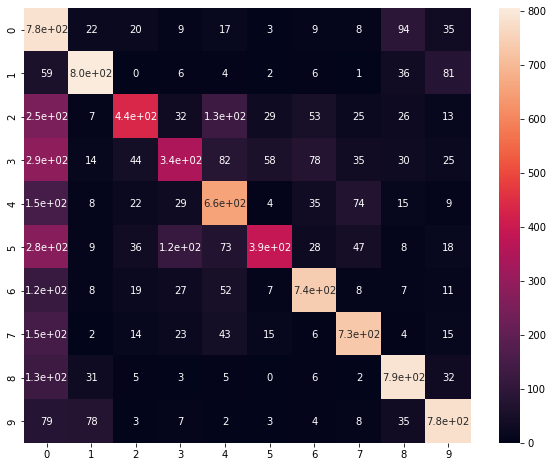

In [36]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_cat_test.argmax(axis = 1), predictions.argmax(axis = 1)), annot=True)

### Predicting a new value

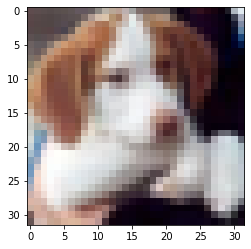

In [39]:
plt.imshow(x_test[16])

In [41]:
my_image = x_test[16]
model.predict(my_image.reshape(1,32, 32, 3)).round()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)